<a href="https://colab.research.google.com/github/e19166/e19-4yp-Dynamic-Multi-Dimensional-Resource-Orchestration-in-Kubernetes/blob/main/results/pw_gen_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df = pd.read_csv('rand-pw-gen-deployment_dataset.csv')
df.head()  # to preview the data

,Timestamp,Service,CPU Request,Memory Request,CPU Limit,Memory Limit,Latency,CPU Usage,Memory Usage,CPU Throttling,Memory Working Set
0,2025-05-10T00:02:10.663000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.083522,0.003175,151572480,26.583535,143400960
1,2025-05-10T00:02:40.758000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.082384,0.003133,151572480,26.583535,143400960
2,2025-05-10T00:03:10.860000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.082384,0.003163,151633920,26.583535,143462400
3,2025-05-10T00:03:40.958000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.074799,0.003134,151633920,26.583535,143462400
4,2025-05-10T00:04:11.055000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.074799,0.003165,151855104,26.699544,143683584


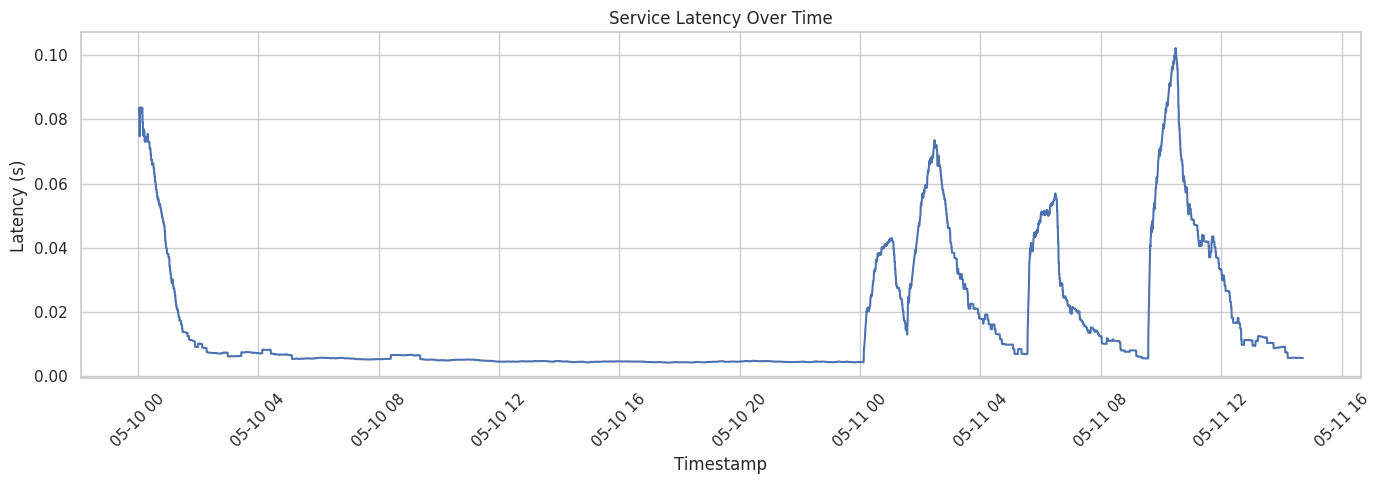

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')


# Set visual style
sns.set(style="whitegrid")

# Plotting functions
def plot_time_series(x, y, ylabel, title):
  plt.figure(figsize=(14, 5))
  sns.lineplot(x=x, y=y)
  plt.ylabel(ylabel)
  plt.xlabel("Timestamp")
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 1. Latency over time
plot_time_series(df['Timestamp'], df['Latency'], 'Latency (s)', 'Service Latency Over Time')